Trabalho de Tópicos I


Nome: Vinícius Barbosa da Silva


Matrícula: 20181SI0007


Prof: Josenildo Costa da Silva

## Dataset:

**Este conjunto de dados contém informações sobre imóveis para aluguel em São Paulo, Brasil. Os dados foram extraídos da plataforma QuintoAndar usando técnicas de web scraping em 1º de maio de 2023. O conjunto de dados inclui várias informações úteis, como endereço do imóvel, bairro, área, número de quartos, disponibilidade de garagem, aluguel mensal, tipo de imóvel , e custo total.**

disponível em: https://www.kaggle.com/datasets/renatosn/sao-paulo-housing-prices

**Colunas:**

address - O endereço da propriedade.

district - O distrito onde o imóvel está localizado.

area - A área do imóvel em metros quadrados.

bedrooms - O número de quartos na propriedade.

garage - O número de lugares de estacionamento disponíveis na propriedade.

type - O tipo de imóvel (apartamento, casa, etc.).

rent - O aluguel mensal do imóvel.

total - O custo total da propriedade, incluindo aluguel, impostos e outras taxas.

---



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.sample(10)

,address,district,area,bedrooms,garage,type,rent,total
9049,Rua Conde Prates,Parque da Mooca,400,4,5,Casa,15000,16390
260,Rua Nanuque,Vila Leopoldina,115,3,2,Apartamento,4450,6177
1167,Rua Lemos Torres,Alto da Mooca,95,2,1,Casa,4200,4275
7036,Rua Mil Oitocentos E Vinte E Dois,Ipiranga,126,2,2,Casa,4000,4067
10517,Rua Antão Leme da Silva,Cidade Líder,42,2,0,Apartamento,3000,3296
508,Rua Josef Kryss,Parque Industrial Tomas Edson,29,1,0,Apartamento,1760,2206
6314,Rua São Francisco,Sé,30,1,0,Apartamento,903,1425
1404,Avenida Salgado Filho,Centro,31,1,1,Studio e kitnet,2150,2568
9821,Rua Abílio Soares,Paraíso,230,5,3,Apartamento,12800,17390
4066,Rua dos Carmelitas,Liberdade,54,1,0,Apartamento,1650,2201


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [ ]:
df.describe()

,area,bedrooms,garage,rent,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


## Detecção de Valores ausentes

---



In [ ]:
df.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()                                 #Total missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)         # Percentage of missing values
    mis_val_df = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_df.rename(columns = {0 : 'Ausentes',
                                 1 : 'Percentual'},
                      inplace=True)
    mis_val_df = mis_val_df[mis_val_df.iloc[:,1] != 0]
    mis_val_df = mis_val_df.sort_values('Percentual',
                           ascending=False).round(1)
    return mis_val_df

In [ ]:
missing_values_table(df)

,Ausentes,Percentual


<Axes: >

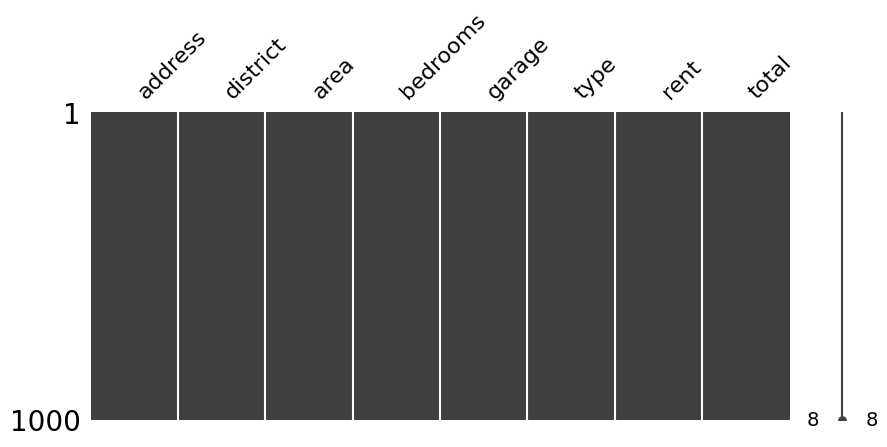

In [ ]:
msno.matrix(df.sample(1000),figsize=(10,4))

## Tratamento de Anômalos

In [ ]:
df.mean(numeric_only=True)

area          84.655658
bedrooms       1.966286
garage         1.060393
rent        3250.814789
total       4080.030625
dtype: float64

### Funções

-Regra empírica 3*std

In [ ]:
def drop_outliers_std_v2(df, field_name, k=3):
    mean, std = df[field_name].mean(), df[field_name].std()
    lower, upper = mean - k*std, mean + k*std
    return df.query(f'{lower} <= {field_name} <= {upper}').copy()

In [ ]:
def drop_outliers_3std(df, field_name):
  df2 = df.copy()
  m = df2[field_name].mean()
  sd = df2[field_name].std()
  upper = m + 3*sd
  lower = m - 3*sd
  i_up = df2[df2[field_name] > upper].index
  i_lo = df2[df2[field_name] < lower].index
  df2.drop(i_up, axis=0, inplace=True)
  df2.drop(i_lo, axis=0, inplace=True)
  return df2

Tratamento com IQR

In [ ]:
def drop_outliers_iqr(df, field_name):
  df2 = df.copy()
  q1 = df2[field_name].quantile(.25)
  q3 = df2[field_name].quantile(.75)
  iqr = q3- q1
  upper = q3 + 1.5*iqr
  lower = q1 - 1.5*iqr
  i_up = df2[df2[field_name] > upper].index
  i_lo = df2[df2[field_name] < lower].index
  df2.drop(i_up, axis=0, inplace=True)
  df2.drop(i_lo, axis=0, inplace=True)
  return df2

Tratamento Z-score

In [ ]:
def drop_outliers_z(df,col,k=3):
  z_values = np.abs(stats.zscore(df[col]))
  return df[z_values < k]

boxplots

In [ ]:
def boxplots_pos_out(df,df2,col):
  fig, axes = plt.subplots(ncols=2, figsize=(5,5))
  sns.boxplot(data=df,y=col,palette="muted",ax=axes[0])
  sns.boxplot(data=df2,y=col,palette="muted",ax=axes[1])
  plt.tight_layout()
  plt.show()

### Coluna - Área

In [ ]:
area_df1 = drop_outliers_3std(df,'area')
area_df1v2 = drop_outliers_std_v2(df,'area')

In [ ]:
area_df2 = drop_outliers_iqr(df,'area')

In [ ]:
area_df4 = drop_outliers_z(df,'area')

<Axes: xlabel='area', ylabel='Count'>

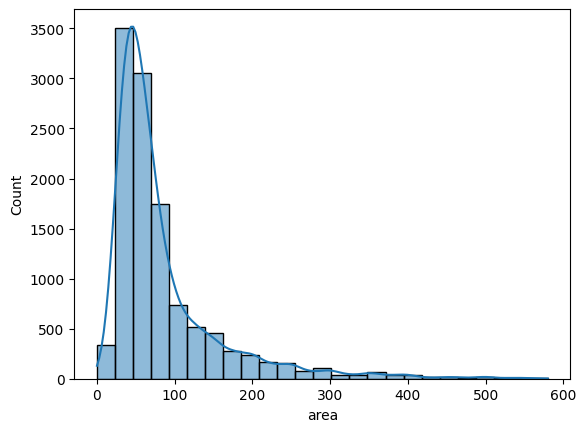

In [ ]:
sns.histplot(data=df['area'], bins=25,kde=True)

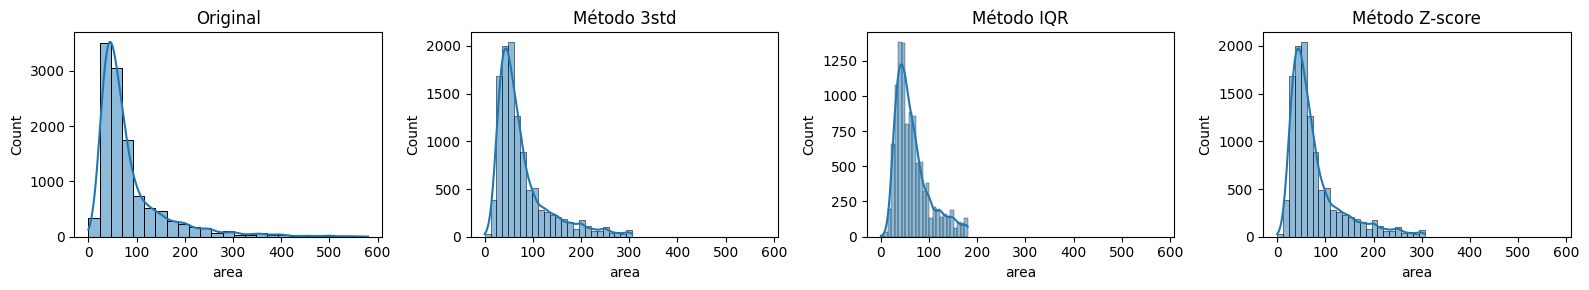

In [ ]:
fig,axes=plt.subplots(ncols=4,figsize=(16,3),sharex=True)
sns.histplot(df['area'],bins=25,ax=axes[0],kde=True)
axes[0].set_title("Original")
sns.histplot(area_df1['area'],bins=25,ax=axes[1],kde=True)
axes[1].set_title("Método 3std")
sns.histplot(area_df2['area'],bins=25,ax=axes[2],kde=True)
axes[2].set_title("Método IQR")
sns.histplot(area_df4['area'],bins=25,ax=axes[3],kde=True)
axes[3].set_title("Método Z-score")
plt.tight_layout()

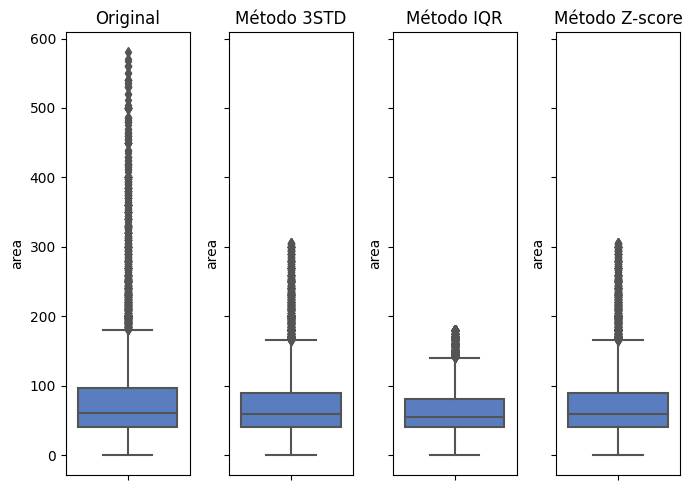

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(7,5),sharey=True)
sns.boxplot(data=df,y='area',palette="muted",ax=axes[0])
axes[0].set_title("Original")
sns.boxplot(data=area_df1,y='area',palette="muted",ax=axes[1])
axes[1].set_title("Método 3STD")
sns.boxplot(data=area_df2,y='area',palette="muted",ax=axes[2])
axes[2].set_title("Método IQR")
sns.boxplot(data=area_df4,y='area',palette="muted",ax=axes[3])
axes[3].set_title("Método Z-score")
plt.tight_layout()
plt.show()

### Coluna - bedrooms

In [ ]:
bedrooms_df1 = drop_outliers_3std(df,'bedrooms')
bedrooms_df1v2 = drop_outliers_std_v2(df,'bedrooms')
bedrooms_df2 = drop_outliers_iqr(df,'bedrooms')
bedrooms_df4 = drop_outliers_z(df,'bedrooms')

<Axes: xlabel='bedrooms', ylabel='Count'>

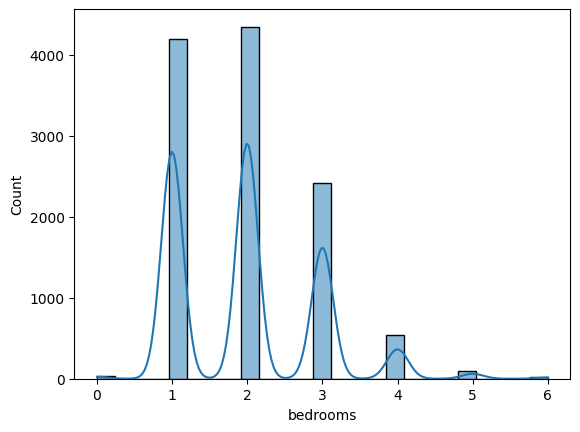

In [ ]:
sns.histplot(data=df['bedrooms'], bins=25,kde=True)

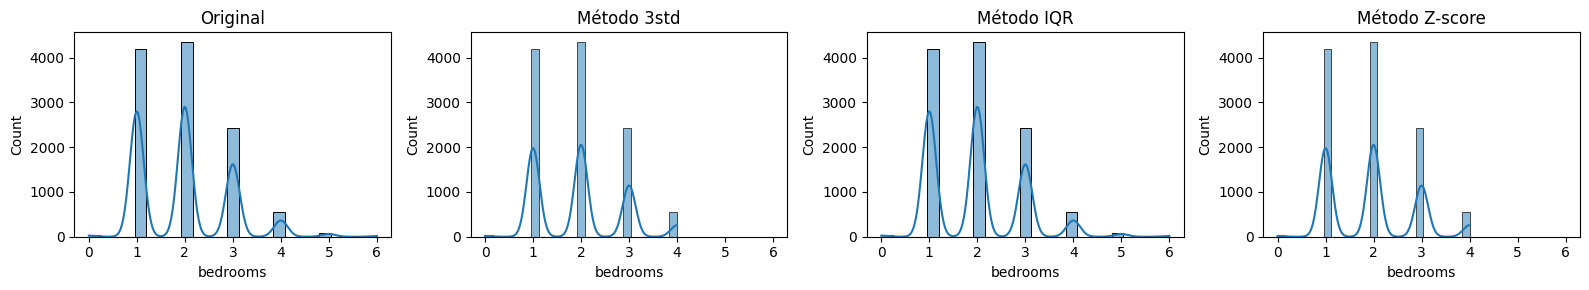

In [ ]:
fig,axes=plt.subplots(ncols=4,figsize=(16,3),sharex=True)
sns.histplot(df['bedrooms'],bins=25,ax=axes[0],kde=True)
axes[0].set_title("Original")
sns.histplot(bedrooms_df1['bedrooms'],bins=25,ax=axes[1],kde=True)
axes[1].set_title("Método 3std")
sns.histplot(bedrooms_df2['bedrooms'],bins=25,ax=axes[2],kde=True)
axes[2].set_title("Método IQR")
sns.histplot(bedrooms_df4['bedrooms'],bins=25,ax=axes[3],kde=True)
axes[3].set_title("Método Z-score")
plt.tight_layout()

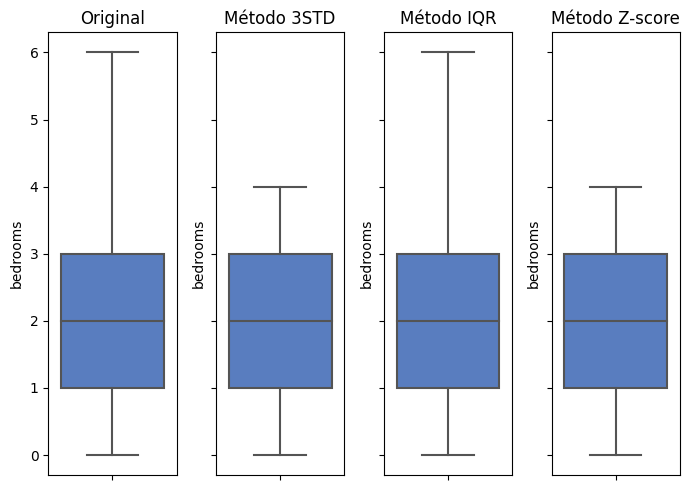

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(7,5),sharey=True)
sns.boxplot(data=df,y='bedrooms',palette="muted",ax=axes[0])
axes[0].set_title("Original")
sns.boxplot(data=bedrooms_df1,y='bedrooms',palette="muted",ax=axes[1])
axes[1].set_title("Método 3STD")
sns.boxplot(data=bedrooms_df2,y='bedrooms',palette="muted",ax=axes[2])
axes[2].set_title("Método IQR")
sns.boxplot(data=bedrooms_df4,y='bedrooms',palette="muted",ax=axes[3])
axes[3].set_title("Método Z-score")
plt.tight_layout()
plt.show()

### Coluna - garage

In [ ]:
garage_df1 = drop_outliers_3std(df,'garage')
garage_df1v2 = drop_outliers_std_v2(df,'garage')
garage_df2 = drop_outliers_iqr(df,'garage')
garage_df4 = drop_outliers_z(df,'garage')

<Axes: xlabel='garage', ylabel='Count'>

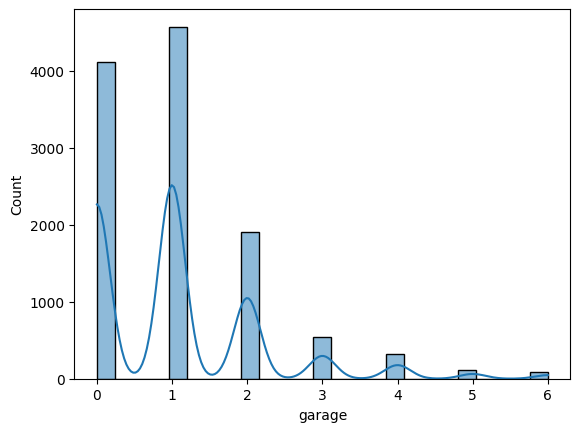

In [ ]:
sns.histplot(data=df['garage'], bins=25,kde=True)

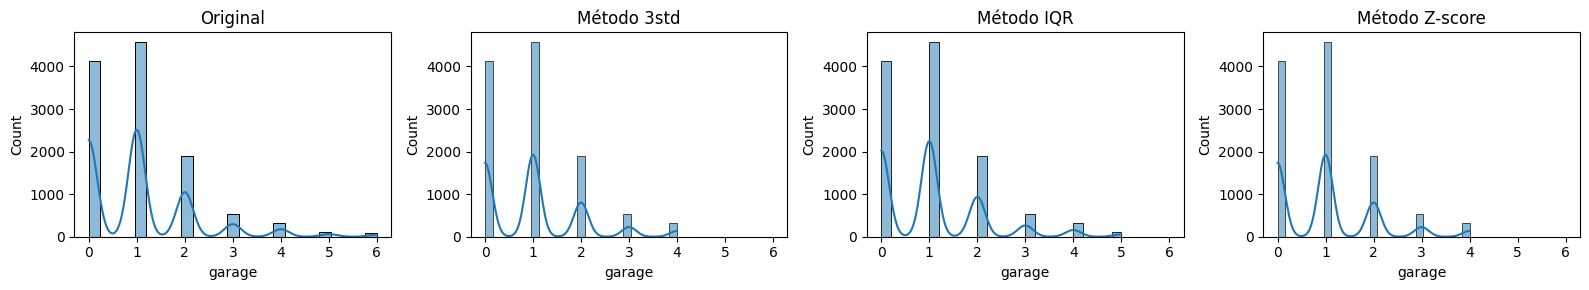

In [ ]:
fig,axes=plt.subplots(ncols=4,figsize=(16,3),sharex=True)
sns.histplot(df['garage'],bins=25,ax=axes[0],kde=True)
axes[0].set_title("Original")
sns.histplot(garage_df1['garage'],bins=25,ax=axes[1],kde=True)
axes[1].set_title("Método 3std")
sns.histplot(garage_df2['garage'],bins=25,ax=axes[2],kde=True)
axes[2].set_title("Método IQR")
sns.histplot(garage_df4['garage'],bins=25,ax=axes[3],kde=True)
axes[3].set_title("Método Z-score")
plt.tight_layout()

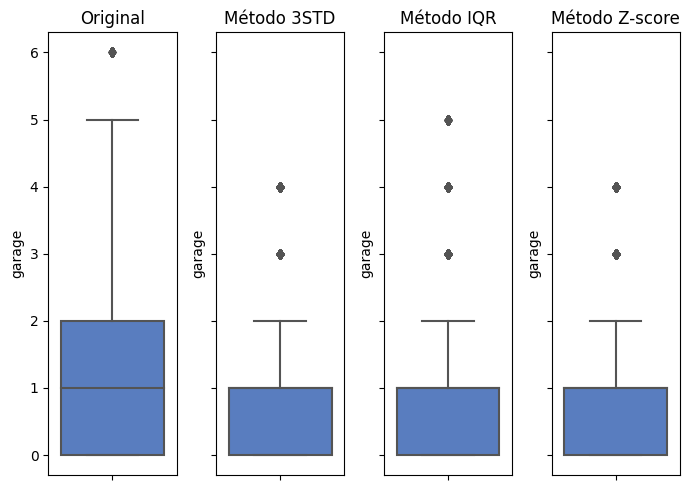

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(7,5),sharey=True)
sns.boxplot(data=df,y='garage',palette="muted",ax=axes[0])
axes[0].set_title("Original")
sns.boxplot(data=garage_df1,y='garage',palette="muted",ax=axes[1])
axes[1].set_title("Método 3STD")
sns.boxplot(data=garage_df2,y='garage',palette="muted",ax=axes[2])
axes[2].set_title("Método IQR")
sns.boxplot(data=garage_df4,y='garage',palette="muted",ax=axes[3])
axes[3].set_title("Método Z-score")
plt.tight_layout()
plt.show()

### Coluna - rent

In [ ]:
rent_df1 = drop_outliers_3std(df,'rent')
rent_df1v2 = drop_outliers_std_v2(df,'rent')
rent_df2 = drop_outliers_iqr(df,'rent')
rent_df4 = drop_outliers_z(df,'rent')

<Axes: xlabel='rent', ylabel='Count'>

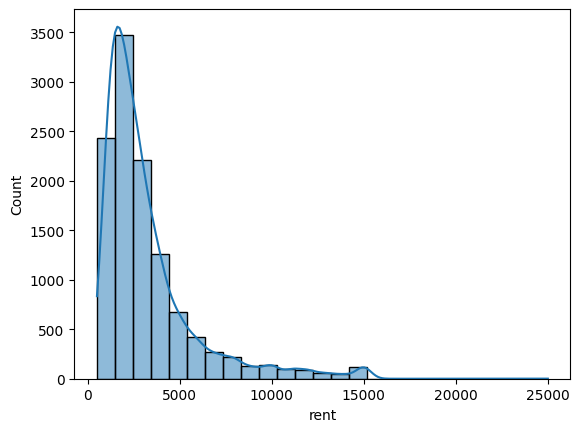

In [ ]:
sns.histplot(data=df['rent'], bins=25,kde=True)

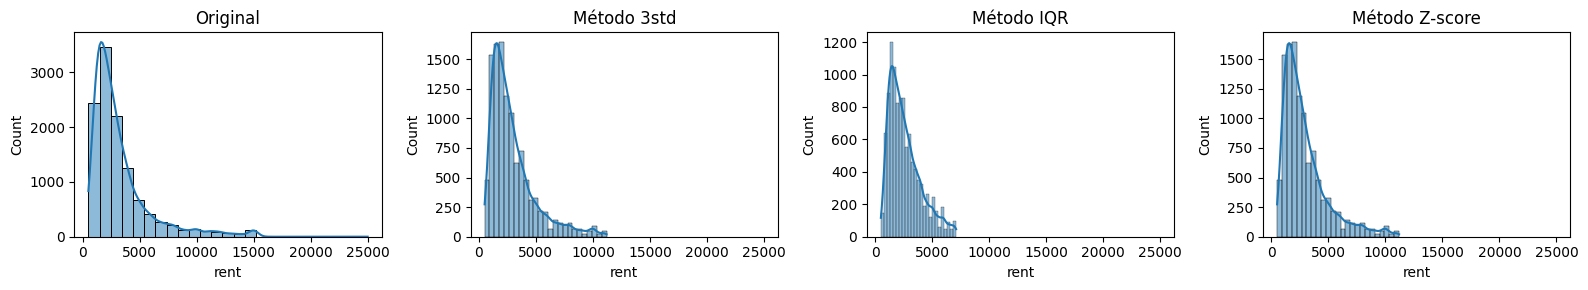

In [ ]:
fig,axes=plt.subplots(ncols=4,figsize=(16,3),sharex=True)
sns.histplot(df['rent'],bins=25,ax=axes[0],kde=True)
axes[0].set_title("Original")
sns.histplot(rent_df1['rent'],bins=25,ax=axes[1],kde=True)
axes[1].set_title("Método 3std")
sns.histplot(rent_df2['rent'],bins=25,ax=axes[2],kde=True)
axes[2].set_title("Método IQR")
sns.histplot(rent_df4['rent'],bins=25,ax=axes[3],kde=True)
axes[3].set_title("Método Z-score")
plt.tight_layout()

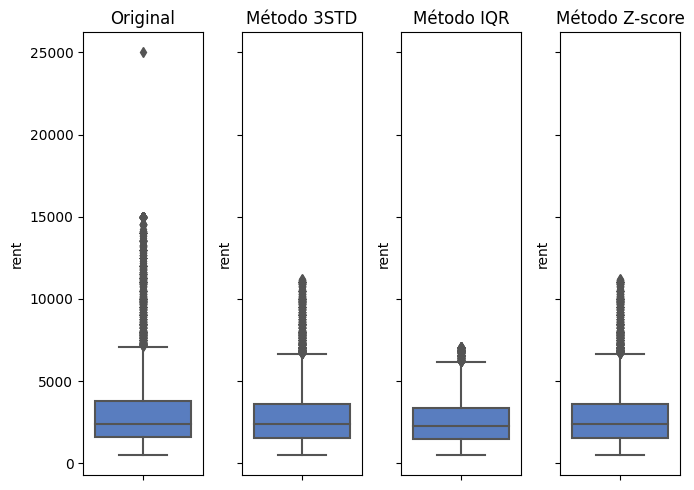

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(7,5),sharey=True)
sns.boxplot(data=df,y='rent',palette="muted",ax=axes[0])
axes[0].set_title("Original")
sns.boxplot(data=rent_df1,y='rent',palette="muted",ax=axes[1])
axes[1].set_title("Método 3STD")
sns.boxplot(data=rent_df2,y='rent',palette="muted",ax=axes[2])
axes[2].set_title("Método IQR")
sns.boxplot(data=rent_df4,y='rent',palette="muted",ax=axes[3])
axes[3].set_title("Método Z-score")
plt.tight_layout()
plt.show()

### Coluna - total

In [ ]:
total_df1 = drop_outliers_3std(df,'total')
total_df1v2 = drop_outliers_std_v2(df,'total')
total_df2 = drop_outliers_iqr(df,'total')
total_df4 = drop_outliers_z(df,'total')

<Axes: xlabel='total', ylabel='Count'>

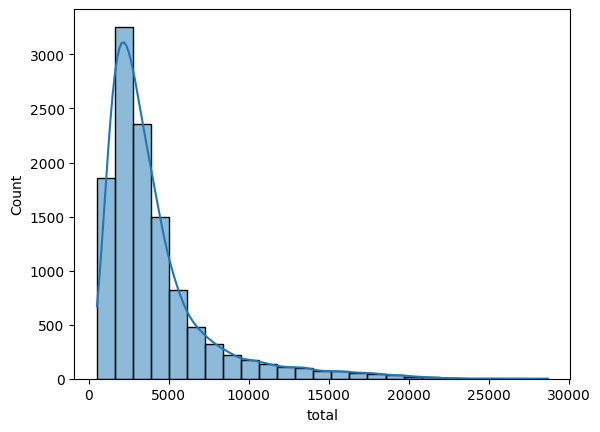

In [ ]:
sns.histplot(data=df['total'], bins=25,kde=True)

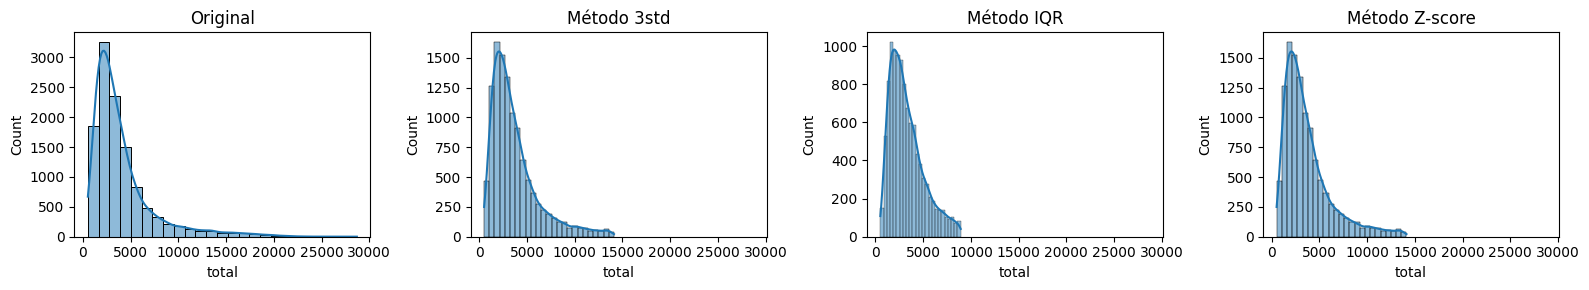

In [ ]:
fig,axes=plt.subplots(ncols=4,figsize=(16,3),sharex=True)
sns.histplot(df['total'],bins=25,ax=axes[0],kde=True)
axes[0].set_title("Original")
sns.histplot(total_df1['total'],bins=25,ax=axes[1],kde=True)
axes[1].set_title("Método 3std")
sns.histplot(total_df2['total'],bins=25,ax=axes[2],kde=True)
axes[2].set_title("Método IQR")
sns.histplot(total_df4['total'],bins=25,ax=axes[3],kde=True)
axes[3].set_title("Método Z-score")
plt.tight_layout()

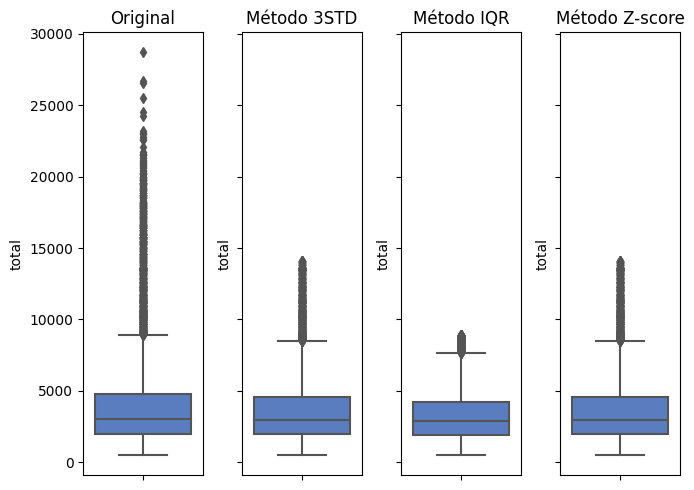

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(7,5),sharey=True)
sns.boxplot(data=df,y='total',palette="muted",ax=axes[0])
axes[0].set_title("Original")
sns.boxplot(data=total_df1,y='total',palette="muted",ax=axes[1])
axes[1].set_title("Método 3STD")
sns.boxplot(data=total_df2,y='total',palette="muted",ax=axes[2])
axes[2].set_title("Método IQR")
sns.boxplot(data=total_df4,y='total',palette="muted",ax=axes[3])
axes[3].set_title("Método Z-score")
plt.tight_layout()
plt.show()

## Transformação de dados

Dados categóricos

In [ ]:
rep_type = df['type'].value_counts()
rep_type

Apartamento           7194
Casa                  2841
Studio e kitnet       1381
Casa em condomínio     241
Name: type, dtype: int64

In [ ]:
rep_address = df['address'].value_counts()
rep_address

Rua da Consolação                      49
Rua Bela Cintra                        47
Avenida Brigadeiro Luís Antônio        36
Avenida Ipiranga                       32
Avenida Nove de Julho                  29
                                       ..
Rua Passo da Pátria                     1
Rua Teixeira Leite                      1
Avenida Professor Abraão de Morais      1
Rua Doutor Joaquim D'aquino Fonseca     1
Rua Abílio Borin                        1
Name: address, Length: 5348, dtype: int64

In [ ]:
rep_district = df['district'].value_counts()
rep_district

Bela Vista               352
Vila Mariana             232
Jardim Paulista          220
Centro                   178
Pinheiros                159
                        ... 
Jardim do Carmo            1
Santa Inês                 1
Jardim Santa Efigenia      1
Vila Maricy                1
Retiro Morumbi             1
Name: district, Length: 1199, dtype: int64

In [ ]:
df2 = df.copy()
df2['type2'] = df.type.astype('category').cat.codes

In [ ]:
df2.sample(n=10)

,address,district,area,bedrooms,garage,type,rent,total,type2
4499,Avenida Padre Arlindo Vieira,Vila Vermelha,56,2,1,Apartamento,1300,1887,0
155,Rua Iquiririm,Vila Indiana,28,1,0,Studio e kitnet,1426,1928,3
3921,Rua Doutor Almeida Lima,Mooca,28,1,0,Studio e kitnet,2200,2284,3
4353,Rua Cesar Vallejo,Real Parque,35,1,1,Apartamento,3500,4092,0
4878,Rua Doutor Djalma Pinheiro Franco,Vila Mascote,25,1,0,Studio e kitnet,865,998,3
11190,Rua Padre João Manuel,Cerqueira César,210,3,1,Apartamento,13260,20220,0
1786,Rua Professor Arnaldo João Semeraro,Jardim Santa Emília,40,2,0,Apartamento,1200,1647,0
10188,Rua Dália,Jardim das Flores,110,3,2,Casa,4000,4350,1
10860,Rua Doutor Rubens Meireles,Várzea da Barra Funda,96,2,2,Apartamento,5300,6549,0
7402,Avenida Junta Mizumoto,Jardim Peri Peri,27,1,0,Casa em condomínio,1700,1957,2


<Axes: >

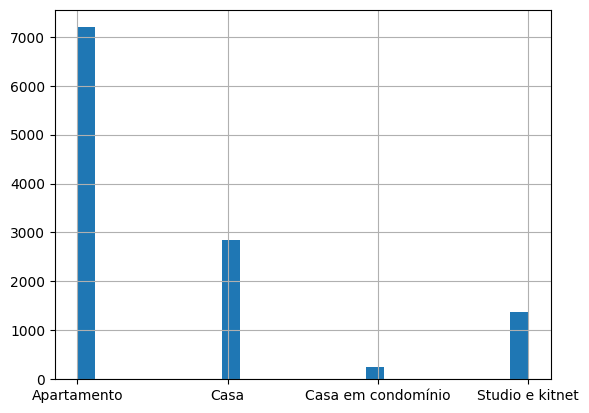

In [ ]:
df2['type'].sort_values().hist(bins=25)

## Parecer